# Visualisasi Data Perkembangan Dan Pembangunan Rumah Susun DKI Jakarta

Data diperoleh dari [Data Jakarta](https://data.jakarta.go.id/dataset/data-perkembangan-dan-pembangunan-rumah-susun)

Terdapat 2 dataset yaitu tahun 2014 dan 2018

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

## Define data

In [ ]:
dwn_url2014='https://data.jakarta.go.id/dataset/ca754029-6273-49ca-a896-70478ad64174/resource/caee49dd-7c45-4dae-93a8-21f849127f31/download/Data-Perkembangan-Dan-Pembangunan-Rumah-Susun-Tahun-2014.csv'
url2014 = requests.get(dwn_url2014).text
csv_raw2014 = StringIO(url2014)
df2014 = pd.read_csv(csv_raw2014)

In [ ]:
#orig_url2018='https://drive.google.com/file/d/1LasQV6oHhyVpSikPVi0Q1lJIE_nVJQMU/view?usp=sharing'

#file_id2018 = orig_url2021.split('/')[-2]
dwn_url2018='https://data.jakarta.go.id/dataset/ca754029-6273-49ca-a896-70478ad64174/resource/0b3516ad-25ed-4b47-ad33-cb6fe8e03cf7/download/Data-perkembangan-dan-Pembangunan-Rumah-susun-Tahun-2018.csv'
#'https://drive.google.com/uc?export=download&id=' + file_id2018
url2018 = requests.get(dwn_url2018).text
csv_raw2018 = StringIO(url2018)
df2018 = pd.read_csv(csv_raw2018)

## Exploratory data

In [ ]:
df2014.head(3)

,kegiatan,lokasi_pembangunan,kelurahan,kecamatan,wilayah,jumlah_unit,status_kepemilikan,anggaran_rupiah
0,"Penyelesaian Pembangunan Rumah Susun KS Tubun,...","Jl. KS Tubun, Kota Bambu Selatan, Pal Merah, J...",Kota Bambu Selatan,Pal Merah,Jakarta Barat,524,Sewa,95000000000
1,Pembangunan Rumah Susun Jatinegara Kaum Blok 1...,"Jl. Raya Bekasi Timur, Jatinegara Kaum, Pulo G...",Jatinegara Kaum,Pulo Gadung,Jakarta Timur,200,Sewa,29591000000
2,"Pembangunan Rumah Susun Tambora Tower A, B dan...","Jl. Angke, Angke, Tambora, Jakarta Barat",Angke,Tambora,Jakarta Barat,549,Sewa,190163050000


In [ ]:
df2014.columns

Index(['kegiatan', 'lokasi_pembangunan', 'kelurahan', 'kecamatan', 'wilayah',
       'jumlah_unit', 'status_kepemilikan', 'anggaran_rupiah'],
      dtype='object')

In [ ]:
df2014.kegiatan.unique()

array(['Penyelesaian Pembangunan Rumah Susun KS Tubun, Jakarta Barat',
       'Pembangunan Rumah Susun Jatinegara Kaum Blok 1 dan 2 (Multi Years TA.2013-2014)',
       'Pembangunan Rumah Susun Tambora Tower A, B dan C (Multi Years TA.2013-2014)',
       'Pembangunan Rumah Susun Pulo Gebang Blok 5 & 6 (Multi Years TA.2013-2014)',
       'Pembangunan Cipinang Besar Selatan Blok 4 & 5 (Multi Years TA.2013- 2014',
       'Pembangunan Rumah Susun untuk Lokasi Binaan (Lokbin) Rawa Buaya',
       'Pembangunan Rumah Susun untuk Lokasi Binaan (Lokbin) Semper',
       'Pembangunan Rumah Susun Pinus Elok 1 Blok',
       'Pembangunan Rumah Susun Rawa Bebek, Jakarta Timur',
       'Pembangunan Rumah Susun Jl. Raya Bekasi Km.2, Jakarta Timur',
       'Pembangunan Rumah Susun Cakung Barat, Jakarta Timur',
       'Pembangunan Rumah Susun Jatinegara Kaum, Jakarta Timur '],
      dtype=object)

In [ ]:
df2014.shape

(12, 8)

Data Pembangunan Rusun pada Tahun 2014 hanya 11.

In [ ]:
df2018.shape

(12, 8)

Data Pembangunan Rusun pada Tahun 2018 hanya 11.
Data tidak relevan, sehingga harus mencari data lain.

# Data Rumah Susun Sederhana Menurut Lokasi Luas Area Tipe dan Kota Administrasi di Provinsi DKI Jakarta

Source :
[Data BPS Rumah Susun DKI Jakarta 2017-2018 dan 2019-2021](https://jakarta.bps.go.id/indicator/4/808/1/jumlah-rumah-susun-sederhana-menurut-lokasi-luas-area-tipe-dan-kota-administrasi-di-provinsi-dki-jakarta.html)

[Data Statistik BPS Rumah Susun Sederhana DKI Jakarta 2020](https://statistik.jakarta.go.id/rumah-susun-sederhana-di-dki-jakarta-tahun-2020/)


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import requests
from io import StringIO

from tensorflow import keras
from tensorflow import nn

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [50]:
df = pd.read_excel('/content/drive/MyDrive/PROA 2022/Jumlah Rumah Susun Sederhana Menurut Lokasi Luas Area Tipe dan Kota Administrasi di Provinsi DKI Jakarta 2017-2020.xlsx')
df.head(2)

,Wilayah,Tahun,Lokasi,Jumlah Unit,Jumlah Blok,Jumlah Tower
0,Jakarta Selatan,2017,2,440,6,-
1,Jakarta Timur,2017,19,8456,89,2


In [51]:
df.shape

(25, 6)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Wilayah       25 non-null     object
 1   Tahun         25 non-null     int64 
 2   Lokasi        25 non-null     int64 
 3   Jumlah Unit   25 non-null     int64 
 4   Jumlah Blok   25 non-null     int64 
 5   Jumlah Tower  25 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.3+ KB


In [53]:
df['Tahun'] = pd.to_datetime(df['Tahun'], format='%Y')

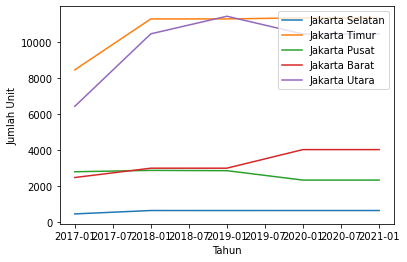

In [54]:
sns.lineplot(data = df, x = 'Tahun', y = 'Jumlah Unit', hue = 'Wilayah')
plt.legend(loc='upper right')
plt.show()

## Model

In [55]:
window = 267

In [56]:
# This value is the window size we are using
index = window

feature, target = [], []

while(index < df.shape[0]):
    feature.append(df.iloc[index - window: index]['Jumlah Unit'].to_numpy())
    target.append(df.iloc[index][['Tahun']].to_numpy())
    index = index + 1
feature = np.array(feature)
target = np.array(target)

In [57]:
size_test = int(df['Tahun'].value_counts().index.shape[0] * 0.8)
separation_date = df['Tahun'].value_counts().index.sort_values()[size_test]

In [58]:
x_train, y_train, x_test, y_test = [], [], [], []
for i,t in enumerate(target):
    if t[1] < separation_date:
        x_train.append(feature[i])
        y_train.append(target[i][0])
    else:
        x_test.append(feature[i])
        y_test.append(target[i][0])

In [59]:
x_train, x_test = np.array(x_train), np.array(x_test)
y_train, y_test = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

In [60]:
scaler_feature = StandardScaler()
scaler_feature.fit(x_train)
x_train = scaler_feature.transform(x_train)
x_test = scaler_feature.transform(x_test)

# Reshaping features for the LSTM
x_train, x_test = x_train.reshape(-1,window,1), x_test.reshape(-1,window,1)

scaler_target = StandardScaler()
scaler_target.fit(y_train)
y_train = scaler_target.transform(y_train)
y_test = scaler_target.transform(y_test)

ValueError: ignored

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units = 128, return_sequences = True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.LSTM(units = 128))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

In [ ]:
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

In [ ]:
# Function to print the results of the fit process
def print_loss(result):
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.legend(['Train', 'Test'])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

print_loss(result)

In [ ]:
y_predicted = model.predict(x_test)

ax = sns.scatterplot(x=y_predicted[:,0], y=y_test[:,0])
ax.set_ylabel('jumlah unit test')
ax.set_xlabel('jumlah unit predicted')
plt.show()

In [ ]:
y_predicted = scaler_target.inverse_transform(y_predicted)

In [ ]:
diff = y_predicted - y_test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))